# Modellvergleich und Visualisierung von Füllstandsprognosen

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


## 2. Daten einlesen und Zielgröße definieren

In [2]:

df = pd.read_csv("X.csv")
y = df['fill_level_grams_red'] + df['fill_level_grams_blue'] + df['fill_level_grams_green']


## 3. Modelle und sinnvolle Trainingskategorien definieren

In [3]:

features_list = [
    ['fill_level_grams_red','fill_level_grams_red', 'fill_level_grams_red'],
    ['fill_level_grams_blue', 'fill_level_grams_blue', 'fill_level_grams_blue'],
    ['fill_level_grams_green', 'fill_level_grams_green', 'fill_level_grams_green'],
    ['temperature_red', 'temperature_blue', 'temperature_green'],
    ['fill_level_grams_red', 'fill_level_grams_blue', 'fill_level_grams_green'],
    ['fill_level_grams_red', 'temperature_red', 'fill_level_grams_blue', 'temperature_blue', 'fill_level_grams_green', 'temperature_green']
]

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
}

scaler = StandardScaler()
results = []


## 4. Training

In [ ]:

for features in features_list:
    X = df[features]
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        results.append({
            "Genutzte Spalten": features,
            "Modell-Typ": model_name,
            "MSE-Wert (Training)": (mse_train, 2),
            "MSE-Wert (Test)": (mse_test, 2)
        })


## 5. Finales Modell mit den besten Features

In [5]:

final_features = features_list[-1]
X_final = df[final_features]
X_scaled_final = scaler.fit_transform(X_final)

best_model = LinearRegression()
best_model.fit(X_scaled_final, y)
y_hat = best_model.predict(X_scaled_final)


In [6]:

output = pd.DataFrame({
    "Flaschen ID": df['bottle'],
    "y_hat": y_hat,
    "y_true": y,
    "abs_error": np.abs(y - y_hat)
})
output.to_csv("reg_52315895-52216154-11733762.csv", index=False)


## 7. Ergebnisse anzeigen

In [7]:

results_df = pd.DataFrame(results)
display(results_df)


,Genutzte Spalten,Modell-Typ,MSE-Wert (Training),MSE-Wert (Test)
0,"[fill_level_grams_red, fill_level_grams_red, f...",Linear Regression,83168.93,71675.19
1,"[fill_level_grams_red, fill_level_grams_red, f...",Gradient Boosting,28211.19,61033.80
2,"[fill_level_grams_red, fill_level_grams_red, f...",Random Forest,24227.00,66368.06
3,"[fill_level_grams_blue, fill_level_grams_blue,...",Linear Regression,68410.10,74259.43
4,"[fill_level_grams_blue, fill_level_grams_blue,...",Gradient Boosting,448.70,1690.17
5,"[fill_level_grams_blue, fill_level_grams_blue,...",Random Forest,1278.50,2403.92
6,"[fill_level_grams_green, fill_level_grams_gree...",Linear Regression,60004.15,65893.45
7,"[fill_level_grams_green, fill_level_grams_gree...",Gradient Boosting,21855.52,33883.83
8,"[fill_level_grams_green, fill_level_grams_gree...",Random Forest,18119.59,39752.93
9,"[temperature_red, temperature_blue, temperatur...",Linear Regression,83310.42,83005.42


## 8. Abweichungen zwischen den Modellen und Realwerten


In [11]:
predictions = pd.DataFrame({
    "Flaschen ID": df['bottle'],
     "y_true": y,
    "linear_regression": models["Linear Regression"].predict(X_scaled_final),
    "difference_linear_regression": np.abs(y - models["Linear Regression"].predict(X_scaled_final)),
    "gradient_boosting": models["Gradient Boosting"].predict(X_scaled_final),
    "difference_gradient_boosting": np.abs(y - models["Gradient Boosting"].predict(X_scaled_final)),
    "random_forest": models["Random Forest"].predict(X_scaled_final),
    "difference_random_forest": np.abs(y - models["Random Forest"].predict(X_scaled_final)),
})
predictions.head(10)

,Flaschen ID,y_true,linear_regression,difference_linear_regression,gradient_boosting,difference_gradient_boosting,random_forest,difference_random_forest
0,368,1274.891617,1274.891617,2.273737e-13,1270.336273,4.555344,1272.462958,2.428659
1,369,1240.444711,1240.444711,0.000000e+00,1237.894824,2.549887,1241.125631,0.680920
2,370,1204.869326,1204.869326,2.273737e-13,1206.225173,1.355847,1201.490125,3.379201
3,371,1164.641153,1164.641153,0.000000e+00,1163.430978,1.210174,1158.148545,6.492608
4,372,1145.686749,1145.686749,0.000000e+00,1142.327284,3.359466,1133.334350,12.352399
5,373,1125.699137,1125.699137,2.273737e-13,1121.566114,4.133022,1115.170543,10.528593
6,374,1105.552741,1105.552741,2.273737e-13,1076.815022,28.737719,1092.566619,12.986122
7,375,1086.240592,1086.240592,0.000000e+00,1077.151925,9.088667,1080.268459,5.972133
8,376,1067.422658,1067.422658,0.000000e+00,1057.126422,10.296236,1059.162431,8.260227
9,377,1048.153608,1048.153608,0.000000e+00,1021.487598,26.666010,1043.530748,4.622860


## 9. Visualisierung: Absoluter Fehler

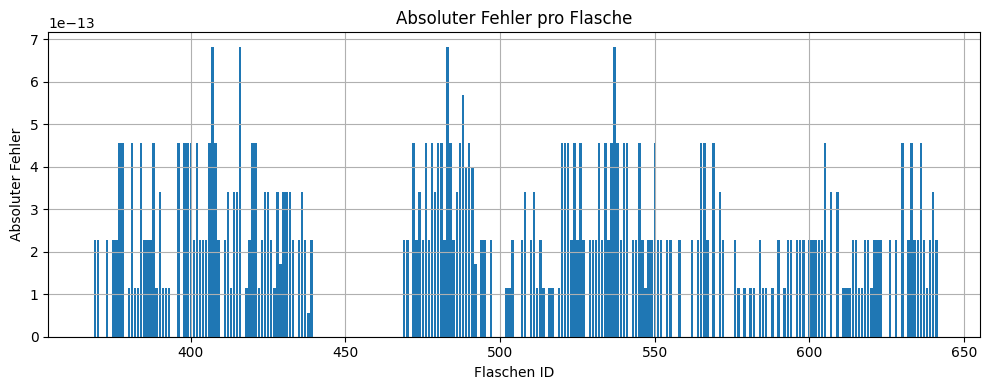

In [15]:

plt.figure(figsize=(10, 4))
plt.bar(df['bottle'], output['abs_error'])
plt.xlabel("Flaschen ID")
plt.ylabel("Absoluter Fehler")
plt.title("Absoluter Fehler pro Flasche")
plt.tight_layout()
plt.grid(True)
plt.show()
